<a href="https://colab.research.google.com/github/nladocsi/DS-2002-F25/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
#1.1
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

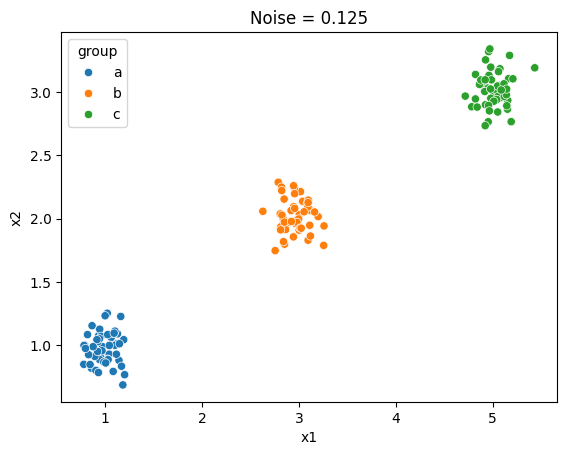

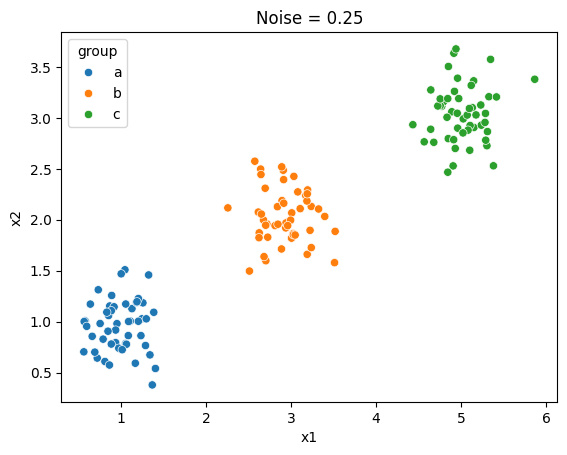

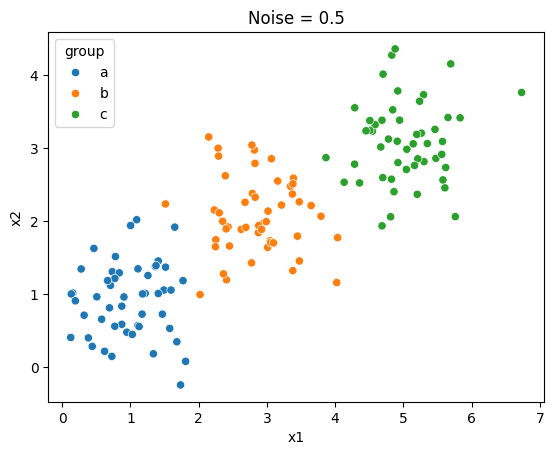

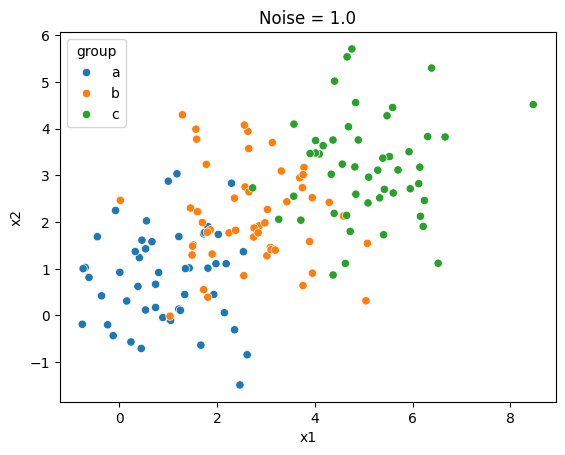

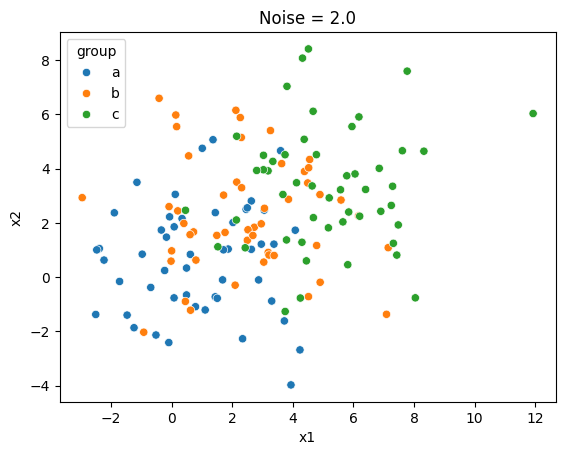

In [3]:
datasets = {
    0.125: df0_125,
    0.25: df0_25,
    0.5: df0_5,
    1.0: df1_0,
    2.0: df2_0
}

for noise, df in datasets.items():
    sns.scatterplot(data=df, x="x1", y="x2", hue="group")
    plt.title(f"Noise = {noise}")
    plt.show()


*   As the noise goes up from 0.125 to 2 the distincness of the cluster diminishes. The cluster separation gets worse as the noise goes up.

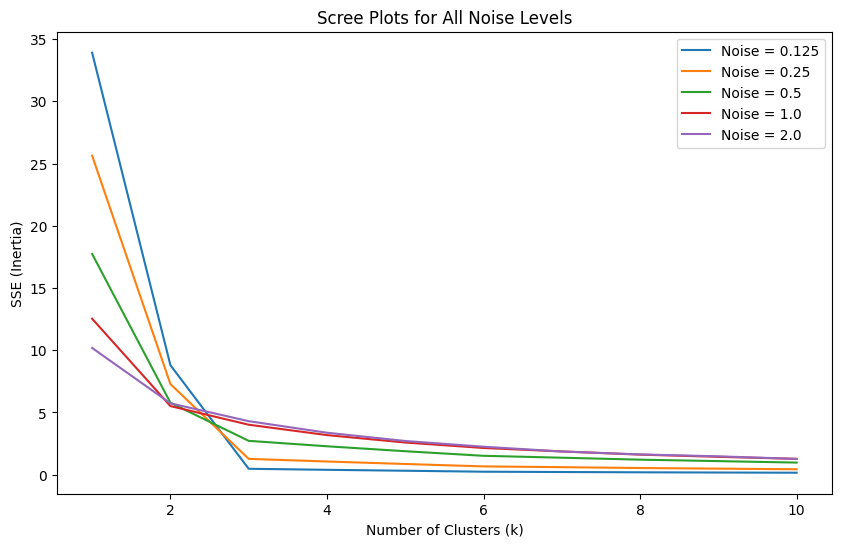

In [4]:
#1.3
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

k_bar = 10

plt.figure(figsize=(10, 6))

for noise, df in datasets.items():
    X = df[["x1", "x2"]].apply(maxmin)
    SSE = []
    for k in range(1, k_bar+1):
        model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
        model.fit(X)
        SSE.append(model.inertia_)

    # Convert SSE to array so Seaborn picks up the label
    sns.lineplot(x=np.arange(1, k_bar+1), y=np.array(SSE), label=f"Noise = {noise}")

plt.title("Scree Plots for All Noise Levels")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.legend()
plt.show()

*   The lower the noise the steeper the elbow in the scree plot
*   When the noise is low there is a very clear elbow ex: k=3 for 0.125.
*   In general with this in mind the clearer the elbow the easier it is to chose a k like for k=3
*   To decide on an optimal k value look for a spot where the SEE drop is significant (k=3)









**Question 1.4**
The elbow occurs when the decrease in SSE levels off making a good choice of k value (how tightly points cluster around centroids).

In this simulation it is illistrated that when there is low noise there is a clearer elbow and it is easy to determine the k value. But conversly when there is high noise there is little to no clear elbow and k is difficult to pick.

To conclude:
*   SEE: tells you how far points are from their cluster centers.
*   When you start with 1 cluster SEE is high since points are clumped together. Then as clusters are added SEE is reduced.
*   Before the elbow adding clusters helps then after the elbow clusters helps less. The elbow shows where the right number of clusters resides!



**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [5]:
#2.1
ec = pd.read_csv('2022 election cycle fundraising.csv')
#print(ec['Raised'].unique(), '\n')

#print(ec.head())
#For Raised Remove Commas and dollar sign (make float)
ec["Raised"] = ec["Raised"].str.replace(',', '', regex=False)
ec['Raised'] = ec['Raised'].str.replace('$', '', regex=False).astype(float)

#Same for Spent!
ec["Spent"] = ec["Spent"].str.replace(',', '', regex=False)
ec['Spent'] = ec['Spent'].str.replace('$', '', regex=False).astype(float)

#Same for Cash on Hand
ec["Cash on Hand"] = ec["Cash on Hand"].str.replace(',', '', regex=False)
ec['Cash on Hand'] = ec['Cash on Hand'].str.replace('$', '', regex=False).astype(float)

#And finally one more time for Debts
ec["Debts"] = ec["Debts"].str.replace(',', '', regex=False)
ec['Debts'] = ec['Debts'].str.replace('$', '', regex=False).astype(float)

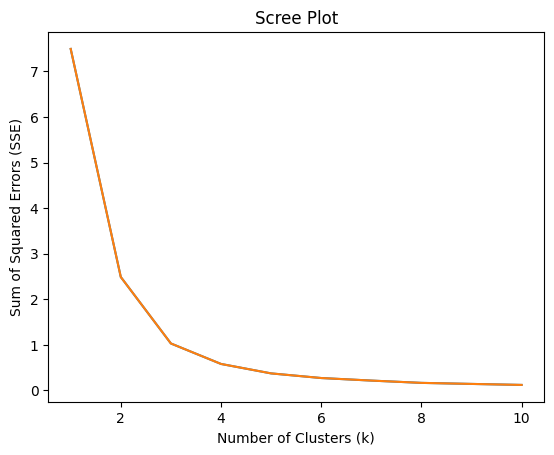

In [6]:
#2.2.1
def maxmin(x):
  return (x-x.min())/(x.max()-x.min())

ec_RS = ec[["Raised", "Spent"]].apply(maxmin)


k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model.fit(ec_RS)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

sns.lineplot(x=np.arange(1, k_bar+1), y=SSE)
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


In [20]:
kstar = 3
model = KMeans(n_clusters=kstar, max_iter=300, n_init = 10, random_state=0) # Create a model for k
model = model.fit(ec_RS)
g_hat = model.predict(ec_RS)
ec['g_hat'] = g_hat
ec_RS['clust'] = model.labels_
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=ec['clust'], style =g_hat)

ValueError: array length 537 does not match index length 637

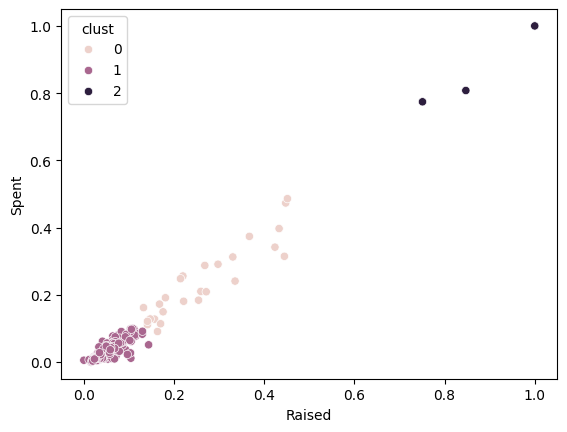

In [7]:
#2.2.2
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(ec_RS)
ec_RS['clust'] = model.labels_

fig2 = sns.scatterplot(x='Raised', y='Spent', data=ec_RS, hue='clust')

Scatter Plot Analysis
*  In this scatter plot there is clear discrepancy between the 3 cluster groups.  
*   Cluster 1 has the largest of the three clusters and the points cluster around the bottom left of the graph
*   Cluster 2 is the opposite and is the smallest and the points are found in the top right (only 3)
*   Cluster 0 is in the middle.

In [8]:
#2.2.3
ec[["Raised_norm", "Spent_norm", "clust"]] = ec_RS[["Raised", "Spent", "clust"]]
cluster_sizes = ec['clust'].value_counts().sort_values()
smallest_two_clusters = cluster_sizes.index[:2]
smallest_clusters_members = ec[ec['clust'].isin(smallest_two_clusters)][['Member', 'clust']]
print(smallest_clusters_members)


                       Member  clust
2                 Adam Schiff      0
12   Alexandria Ocasio-Cortez      0
45             Bernie Sanders      0
87     Catherine Cortez Masto      0
89              Chuck Schumer      0
115              Dan Crenshaw      0
133               David Trone      0
239                Jim Jordan      0
261              John Kennedy      0
269                Jon Ossoff      0
276               Josh Hawley      0
290              Katie Porter      0
298            Kevin McCarthy      0
326             Maggie Hassan      0
328               Marco Rubio      0
336    Marjorie Taylor Greene      0
340                Mark Kelly      2
357            Michael Bennet      0
390              Nancy Pelosi      0
402              Patty Murray      0
414                 Rand Paul      0
417           Raphael Warnock      2
442               Ron Johnson      0
476             Steve Scalise      0
488           Tammy Duckworth      0
489                  Ted Budd      0
4

The above list has all the politicians for the smallest two cluster groups. After researching a handfull of their races they were all EXTREMELY close. These competative races brought in a lot of funding as well as spending! Overall the small clusters show intense competition as well as people with a lot of fundraising power through their recognizable popular names.  

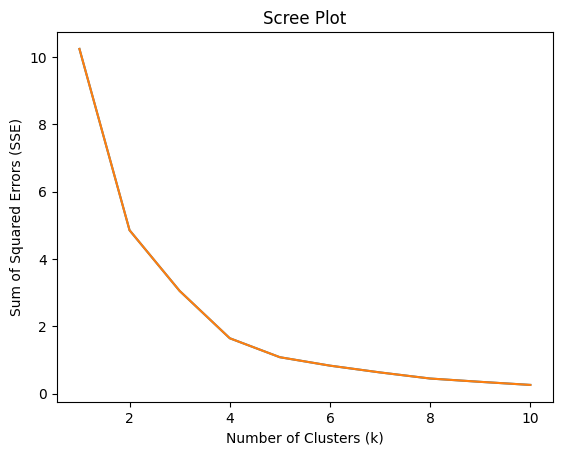

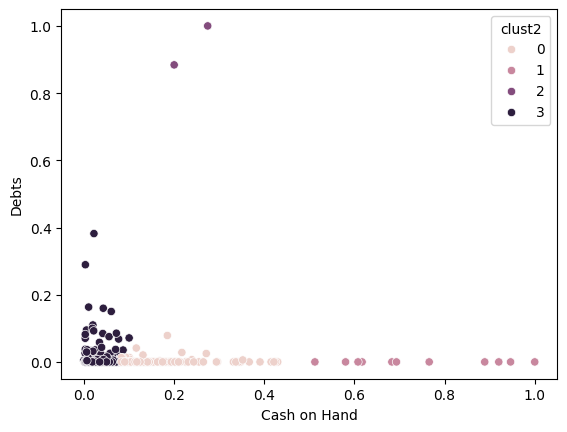

In [9]:
#2.3.1
ec_CD= ec[["Cash on Hand", "Debts"]].apply(maxmin)

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model.fit(ec_CD)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

sns.lineplot(x=np.arange(1, k_bar+1), y=SSE)
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

model2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
model2.fit(ec_CD)
ec_CD['clust2'] = model2.labels_

fig2 = sns.scatterplot(x='Cash on Hand', y='Debts', data=ec_CD, hue='clust2')

In [10]:
#2.3.2
ec[["COH_norm", "Debts_norm", "clust2"]] = ec_CD[["Cash on Hand", "Debts", "clust2"]]
cluster_sizes = ec['clust2'].value_counts().sort_values()
smallest_two_clusters2 = cluster_sizes.index[:2]
smallest_clusters_members2 = ec[ec['clust2'].isin(smallest_two_clusters2)][['Member', 'clust2']]
print(smallest_clusters_members2)

                  Member  clust2
2            Adam Schiff       1
89         Chuck Schumer       1
133          David Trone       2
261         John Kennedy       1
267           John Thune       1
274      Josh Gottheimer       1
290         Katie Porter       1
310       Lindsey Graham       1
340           Mark Kelly       1
412  Raja Krishnamoorthi       1
417      Raphael Warnock       1
442          Ron Johnson       2
500            Tim Scott       1


Similiarly to the money raised and spent clusters the smallest two are elections that ended in very close margins. Interestingly the smallest 2 cluster shows a bit of outlier behavoir because these poiticians had unusual financial situations with high debt. In cluster 1 there was clear strong fundraisers or those who had a less tight ending race.

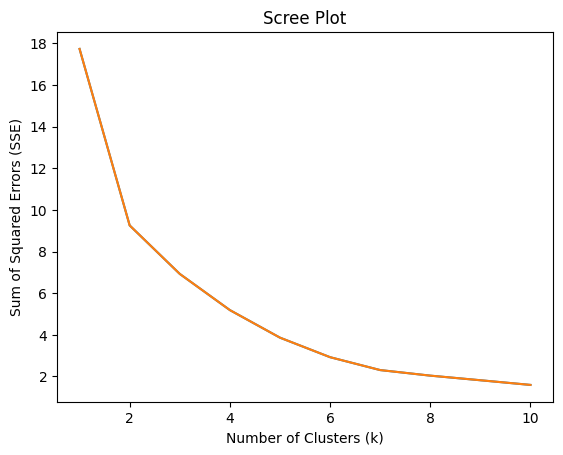

,count
clust_kmeans_4vars,
1,512
0,25


In [19]:
#2.4
ec_all = ec[["COH_norm", "Debts_norm", "Raised_norm", "Spent_norm"]]

k_bar = 10
SSE = []
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model.fit(ec_all)
    SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot')

sns.lineplot(x=np.arange(1, k_bar+1), y=SSE)
plt.title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

#Used this scree plot to determine k value = 2

k_all = 2
kmeans_final = KMeans(n_clusters=k_all, max_iter = 300, n_init = 10, random_state=0)
kmeans_final.fit(ec_all)

ec["clust_kmeans_4vars"] = kmeans_final.labels_
ec["clust_kmeans_4vars"].value_counts()

#pd.crosstab(ec["clust"], ec["clust_kmeans_4vars"])       # from Raised/Spent-only
#pd.crosstab(ec["clust2"], ec["clust_kmeans_4vars"])



**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?